### Import scikit-learn's example wine dataset, and print a description of the dataset

In [2]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### Get the features and target arrays

In [3]:
x = wine.data
y = wine.target

### It will also be useful to scale the x data so that all of the features have a mean value of 0 and a standard deviation of 1

In [4]:
import sklearn.preprocessing
x = sklearn.preprocessing.StandardScaler().fit_transform(x)

### Print the array dimensions of x and y

In [5]:
print("dimensions of x: " + str(x.shape))
print("dimensions of y: " + str(y.shape))

dimensions of x: (178, 13)
dimensions of y: (178,)


### Make histogram plots that show how a given feature in x is distributed for each of the three wine classes

Feature 1:


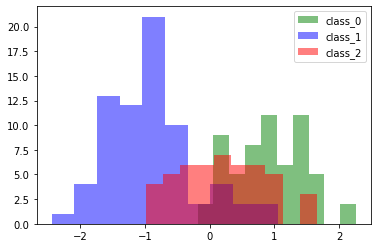

Feature 2:


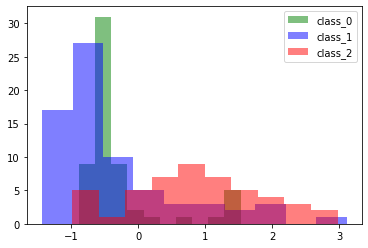

Feature 3:


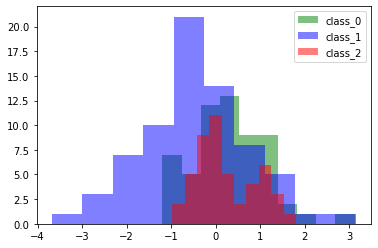

Feature 4:


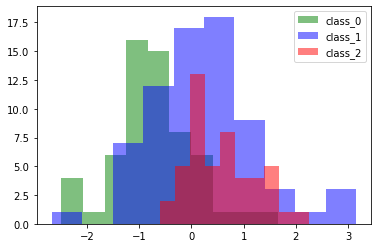

Feature 5:


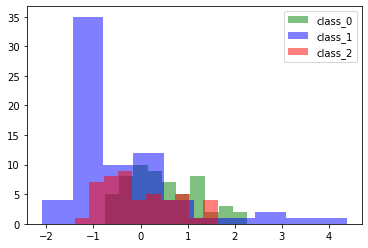

Feature 6:


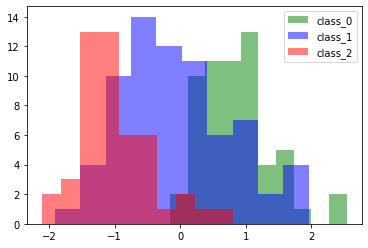

Feature 7:


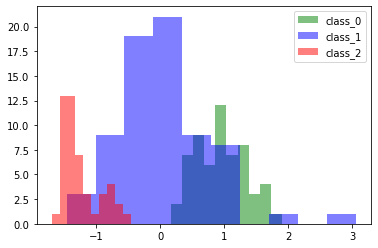

Feature 8:


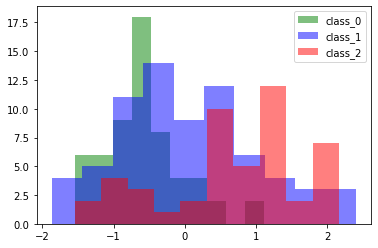

Feature 9:


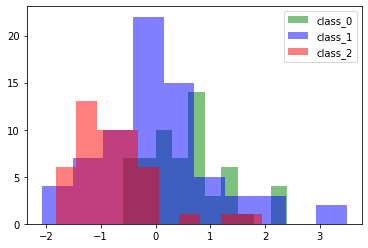

Feature 10:


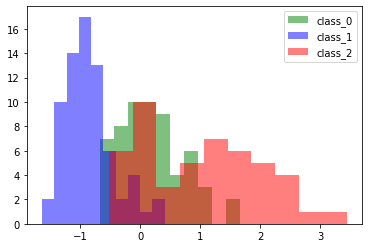

Feature 11:


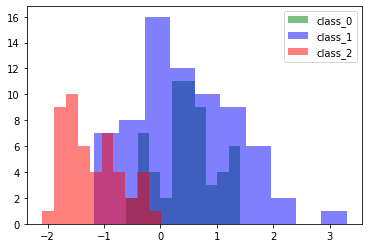

Feature 12:


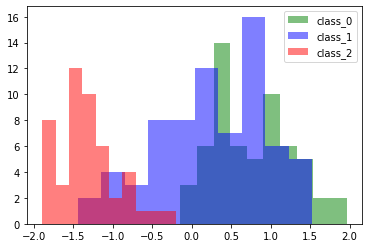

Feature 13:


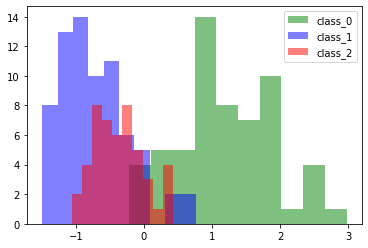

In [8]:
import matplotlib.pyplot as plt

for i in range(13):
    print("Feature " + str(i+1) + ":")
    plt.hist(x[(y==0),i], alpha=0.5, color='green', label='class_0')
    plt.hist(x[(y==1),i], alpha=0.5, color='blue', label='class_1')
    plt.hist(x[(y==2),i], alpha=0.5, color='red', label='class_2')
    plt.legend()
    plt.show()

### Scan through different features, and identify which feature might make for a good feature to use for classification

From scanning through the histogram plots, none of the features seems to give good separation for all 3 classes, though some seem to distinguish between at least 2 classes fairly well. I'll choose Feature 7 to use for classification, since at most points in the x-axis, this feature can rule out at least one class, and for a decent range of values along the x-axis it can also definitely classify into one class.

### Perform classification with LogisticRegression using the one feature you've identified

- Split the data into a training set and a test set
- Train the model (don't have to plot anything this time)
- Print the confusion matrix and scores for accuracy, precision, and recall of the model applied to the test data

In [25]:
import sklearn.model_selection
import sklearn.linear_model

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x[:,6], y, test_size=0.2, random_state=42)
x_train_transformed = x_train.reshape(-1,1)
x_test_transformed = x_test.reshape(-1,1)

model = sklearn.linear_model.LogisticRegression()
model.fit(x_train_transformed, y_train)

y_pred = model.predict(x_test_transformed)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n" + str(confusion_matrix))
classification_report = sklearn.metrics.classification_report(y_test, y_pred)
print("\n")
print("Classification report: \n" + str(classification_report))

Confusion matrix: 
[[12  2  0]
 [ 3  9  2]
 [ 0  1  7]]


Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.75      0.64      0.69        14
           2       0.78      0.88      0.82         8

    accuracy                           0.78        36
   macro avg       0.78      0.79      0.78        36
weighted avg       0.78      0.78      0.77        36



### Repeat this classification process, only now use all 13 features at once when doing your model fit

- Print the confusion matrix and scores for accuracy, precision, and recall of the model applied to the test data

In [26]:
x_train2, x_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

model = sklearn.linear_model.LogisticRegression()
model.fit(x_train2, y_train2)

y_pred2 = model.predict(x_test2)
confusion_matrix2 = sklearn.metrics.confusion_matrix(y_test2, y_pred2)
print("Confusion matrix: \n" + str(confusion_matrix2))
classification_report2 = sklearn.metrics.classification_report(y_test2, y_pred2)
print("\n")
print("Classification report: \n" + str(classification_report2))

Confusion matrix: 
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



- Compare the model's results against the results obtained when training on just one feature

Classification accuracy for all three classes when the logistic regression model was trained on only one feature was surprisingly high, with only a minority of cases (29%) misclassified, and with precision and recall >0.64 for all classes. However, when the model was trained on all 13 features, the algorithm suddenly had perfect prediction on all test set instances, with perfect precision and recall. This shows that useful features employed together can sometimes attain extremely accurate results with logistic regression.